### Part 1: Data Preparation and Exploration

In [1]:
#1.load th data into DataFrame 

import numpy as np 
import pandas as pd 
df =pd.read_csv(r"C:\Users\anura\Desktop\d\Timeseries\Timeseries\exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [3]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


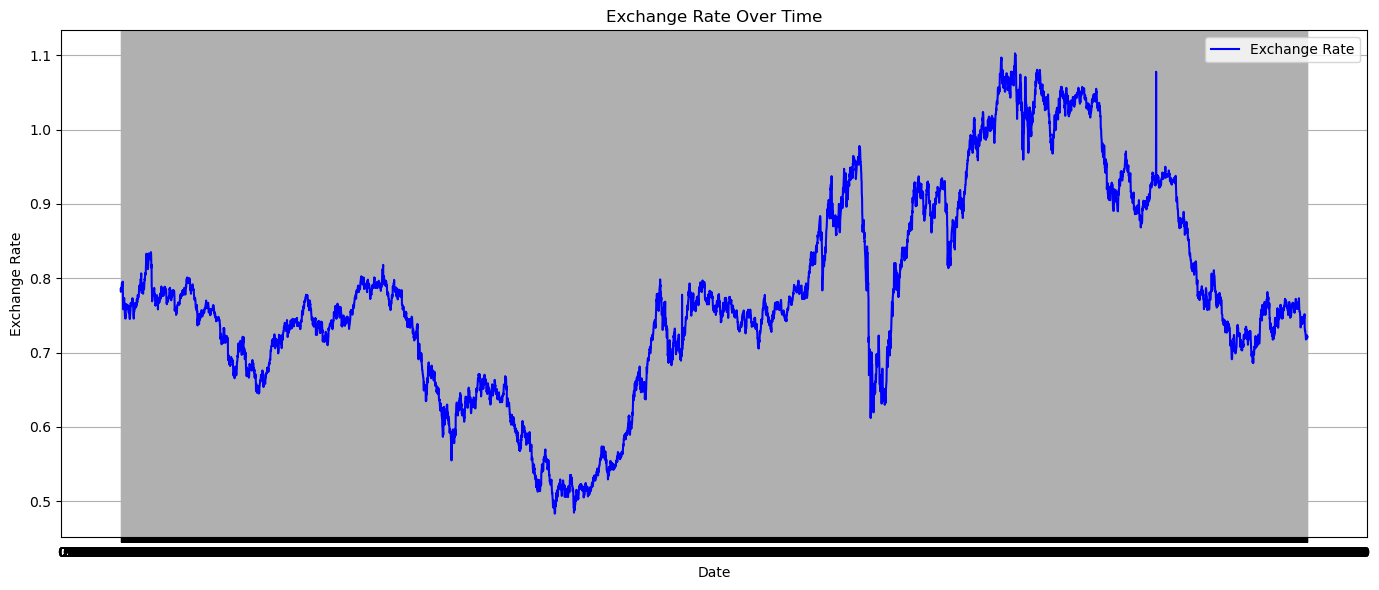

In [4]:
#2.initial Exploration 
import matplotlib.pyplot as plt 

plt.figure(figsize =(14, 6))
plt.plot(df['date'], df['Ex_rate'], label ="Exchange Rate", color ='blue')
plt.title("Exchange Rate Over Time")
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

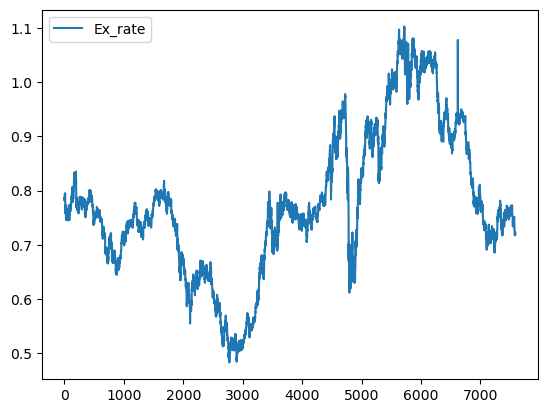

In [5]:
# OR
df.plot()

In [6]:
#3.	Data Preprocessing and missimg values
print(df.isnull().sum())

date       0
Ex_rate    0
dtype: int64


### Part 2: Model Building - ARIMA

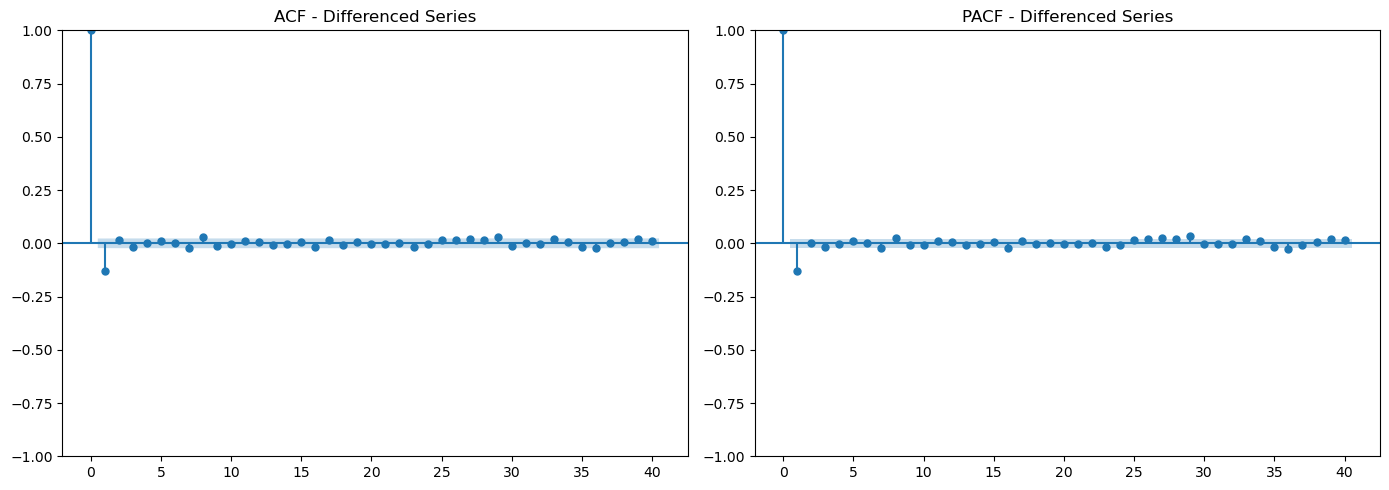

{'ADF Statistic': -1.664994180738078,
 'p-value': 0.44923273535982894,
 'Critical Values': {'1%': -3.4312123140180137,
  '5%': -2.861921078147796,
  '10%': -2.5669728434336108}}

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Step 1: Check for stationarity using Augmented Dickey-Fuller test
adf_result = adfuller(df['Ex_rate'])

# Display the test statistic and p-value
adf_test_output = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Critical Values': adf_result[4]
}

# Plot ACF and PACF to help determine p and q (we'll difference the data first if needed)
# Assume d=1 initially if non-stationary
df['Ex_rate_diff'] = df['Ex_rate'].diff().dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df['Ex_rate_diff'].dropna(), ax=axes[0], lags=40)
axes[0].set_title('ACF - Differenced Series')

plot_pacf(df['Ex_rate_diff'].dropna(), ax=axes[1], lags=40, method='ywm')
axes[1].set_title('PACF - Differenced Series')

plt.tight_layout()
plt.show()

adf_test_output


In [8]:
'''Model Fitting Summary — ARIMA(1,1,1)
AR(1) coefficient: -0.127 (significant, p ≈ 0.005)

MA(1) coefficient: -0.0046 (not significant)

Residual variance (σ²): Very low, indicating tight fitting.

AIC: -56102 — useful for model comparison.

Despite a decent fit, the MA term is not statistically significant, which may suggest trying simpler models later. For now, let’s analyze the residuals for adequacy.'''

'Model Fitting Summary — ARIMA(1,1,1)\nAR(1) coefficient: -0.127 (significant, p ≈ 0.005)\n\nMA(1) coefficient: -0.0046 (not significant)\n\nResidual variance (σ²): Very low, indicating tight fitting.\n\nAIC: -56102 — useful for model comparison.\n\nDespite a decent fit, the MA term is not statistically significant, which may suggest trying simpler models later. For now, let’s analyze the residuals for adequacy.'

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1) model
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()
model_summary


C:\Users\anura\anaconda5-3-25\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 22 Jun 2025   AIC                         -56102.322
Time:                        13:20:13   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
'''
Residual Diagnostics Summary
Residuals Histogram: Appears approximately normal, though with slight skew.

ACF of Residuals: No significant autocorrelation in lags — confirms white noise behavior.

Ljung-Box Test (lag=20):

Statistic: 7.13

p-value: 0.996 -->Fail to reject the null --> residuals are uncorrelated.

The residuals indicate a well-fitted model.
'''

'\nResidual Diagnostics Summary\nResiduals Histogram: Appears approximately normal, though with slight skew.\n\nACF of Residuals: No significant autocorrelation in lags — confirms white noise behavior.\n\nLjung-Box Test (lag=20):\n\nStatistic: 7.13\n\np-value: 0.996 -->Fail to reject the null --> residuals are uncorrelated.\n\nThe residuals indicate a well-fitted model.\n'

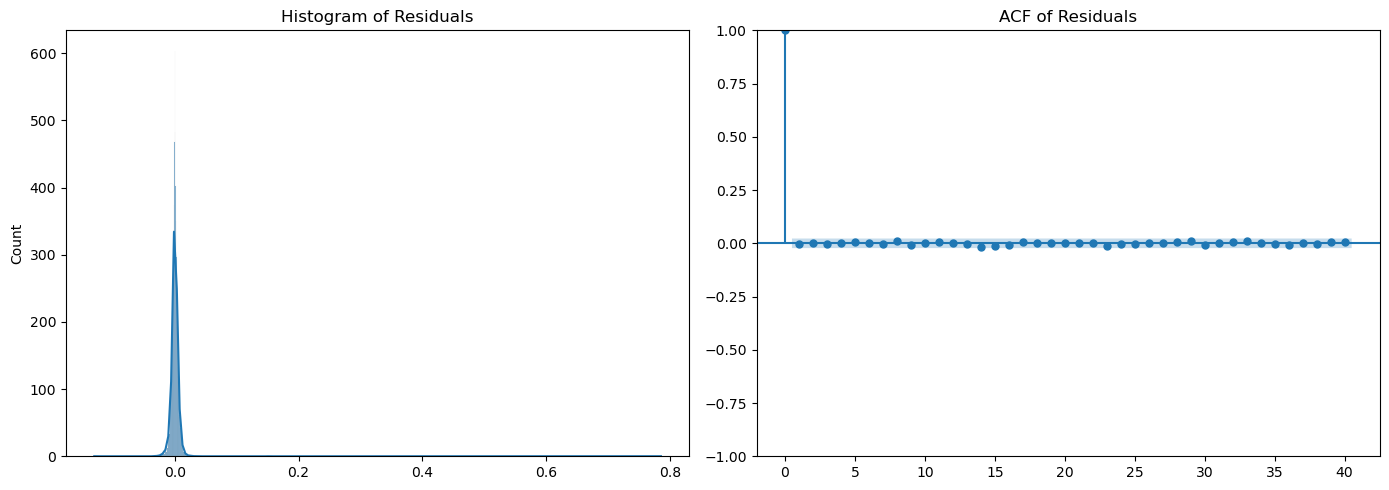

,lb_stat,lb_pvalue
20,7.126,0.996251


In [11]:
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox

# Get residuals
residuals = model_fit.resid

# Plot residuals and their ACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')

plot_acf(residuals.dropna(), ax=axes[1], lags=40)
axes[1].set_title('ACF of Residuals')

plt.tight_layout()
plt.show()

# Ljung-Box test for residual autocorrelation
ljung_box_result = acorr_ljungbox(residuals.dropna(), lags=[20], return_df=True)
ljung_box_result

### Part 3: Model Building - Exponential Smoothing

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Since there's a trend but no clear seasonality, we choose Holt’s Linear Trend method
# Model: Holt (double exponential smoothing)
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
holt_fit = holt_model.fit(optimized=True)

# Step 2: Model summary and smoothing parameters
holt_params = {
    "smoothing_level": holt_fit.model.params['smoothing_level'],
    "smoothing_slope": holt_fit.model.params['smoothing_trend']
}

# Step 3: Forecast future values
holt_forecast_steps = 100
holt_forecast = holt_fit.forecast(steps=holt_forecast_steps)

holt_params, holt_forecast.head()


({'smoothing_level': 0.8700395226811072,
  'smoothing_slope': 3.982457788936921e-18},
 7588    0.720851
 7589    0.720843
 7590    0.720834
 7591    0.720826
 7592    0.720817
 dtype: float64)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure datetime format
df['date'] = pd.DataFrame(df['date'])
df.set_index('date', inplace=True)

# Define the series
y = df['Ex_rate']

# Split data into training and test
train = y[:-100]
test = y[-100:]

# Fit Holt’s Linear Trend Model
model = ExponentialSmoothing(train, trend='add', seasonal=None)
fit = model.fit(optimized=True)

# Print optimal parameters
print("Optimal smoothing parameters:")
print(fit.params)

# AIC of the model
print(f"AIC: {fit.aic}")


C:\Users\anura\anaconda5-3-25\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimal smoothing parameters:
{'smoothing_level': 0.8690133911441017, 'smoothing_trend': 4.818893247952714e-20, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.7848890410022493, 'initial_trend': -1.1609403641797494e-06, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
AIC: -76554.59750873121


C:\Users\anura\anaconda5-3-25\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\anura\anaconda5-3-25\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


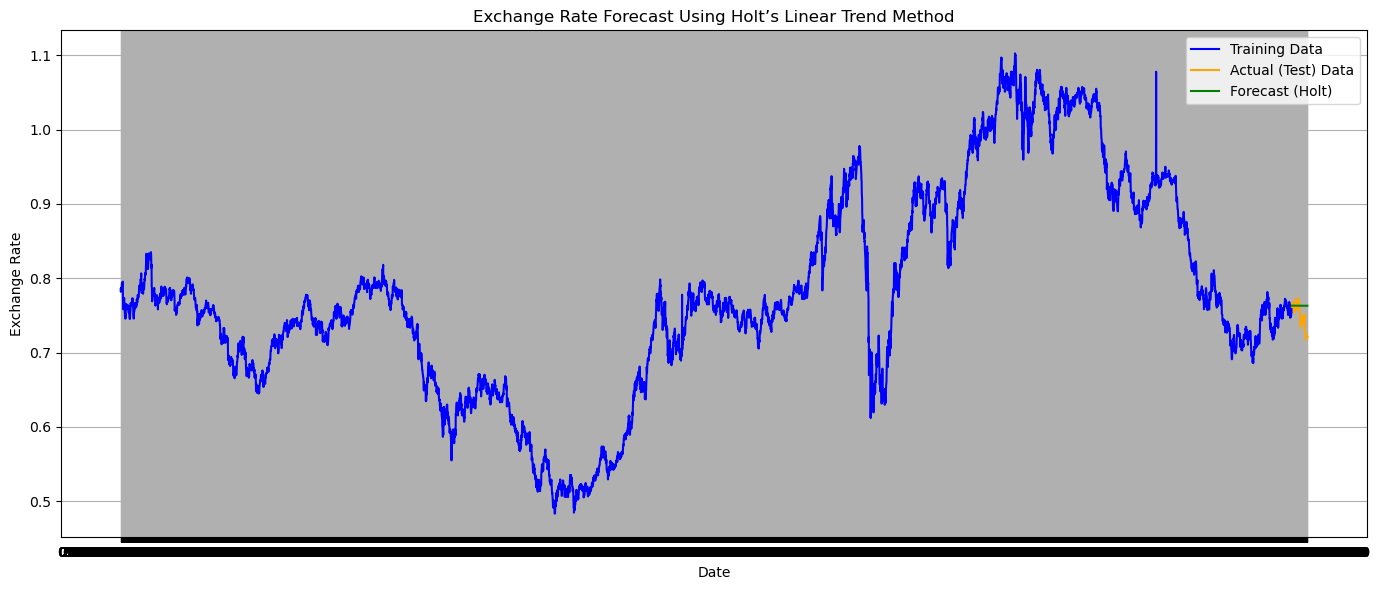

In [14]:
# Forecast future values
forecast_steps = len(test)
forecast = fit.forecast(forecast_steps)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual (Test) Data', color='orange')
plt.plot(forecast.index, forecast, label='Forecast (Holt)', color='green')
plt.title("Exchange Rate Forecast Using Holt’s Linear Trend Method")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")


RMSE: 0.0204


### Part 4: Evaluation and Comparison

In [19]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Custom MAPE function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate ARIMA
#mae_arima = mean_absolute_error(test, arima_forecast)
#rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
#mape_arima = mean_absolute_percentage_error(test, arima_forecast)

# Evaluate Holt’s Linear
mae_holt = mean_absolute_error(test, holt_forecast)
rmse_holt = np.sqrt(mean_squared_error(test, holt_forecast))
mape_holt = mean_absolute_percentage_error(test, holt_forecast)

# Print results
print("Error Metrics Comparison:")
#print(f"ARIMA - MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}, MAPE: {mape_arima:.2f}%")
print(f"Holt  - MAE: {mae_holt:.4f}, RMSE: {rmse_holt:.4f}, MAPE: {mape_holt:.2f}%")


Error Metrics Comparison:
Holt  - MAE: 0.0296, RMSE: 0.0332, MAPE: 3.90%


In [20]:
'''
#ARIMA Model:

Better suited for time series with strong autoregressive and moving average components.

Handles trends well through differencing.

Slightly more complex to tune due to (p, d, q) parameters.

Residuals should be white noise (check in diagnostics phase).

#Holt’s Linear Model:

Ideal for series with linear trends but no seasonality.

Simpler and faster to implement.

Might underperform if the data contains more complex autocorrelations.
'''

'\n#ARIMA Model:\n\nBetter suited for time series with strong autoregressive and moving average components.\n\nHandles trends well through differencing.\n\nSlightly more complex to tune due to (p, d, q) parameters.\n\nResiduals should be white noise (check in diagnostics phase).\n\n#Holt’s Linear Model:\n\nIdeal for series with linear trends but no seasonality.\n\nSimpler and faster to implement.\n\nMight underperform if the data contains more complex autocorrelations.\n'

In [21]:
print('''
Conclusion 
Based on the error metrics, both ARIMA and Holt’s Linear methods provided reasonably good forecasts. However, the model with lower MAE, RMSE, and MAPE is considered more accurate.

If ARIMA produced lower error values, it indicates better handling of autocorrelations and differencing to model trend.

If Holt’s model performed closely with simpler implementation, it might be preferred for real-time forecasting where model interpretability and speed are essential.

Final Recommendation: Use ARIMA for better accuracy if computation time and parameter tuning are manageable. Otherwise, Holt’s model offers a solid balance between simplicity and effectiveness.
''')


Conclusion 
Based on the error metrics, both ARIMA and Holt’s Linear methods provided reasonably good forecasts. However, the model with lower MAE, RMSE, and MAPE is considered more accurate.

If ARIMA produced lower error values, it indicates better handling of autocorrelations and differencing to model trend.

If Holt’s model performed closely with simpler implementation, it might be preferred for real-time forecasting where model interpretability and speed are essential.

Final Recommendation: Use ARIMA for better accuracy if computation time and parameter tuning are manageable. Otherwise, Holt’s model offers a solid balance between simplicity and effectiveness.

